# library

In [348]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
import warnings
warnings.filterwarnings("ignore")


In [349]:
df=pd.read_csv("titanic_data.csv")

In [350]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [351]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [352]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [353]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [354]:
df.shape

(891, 12)

In [355]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Numerical value analysis

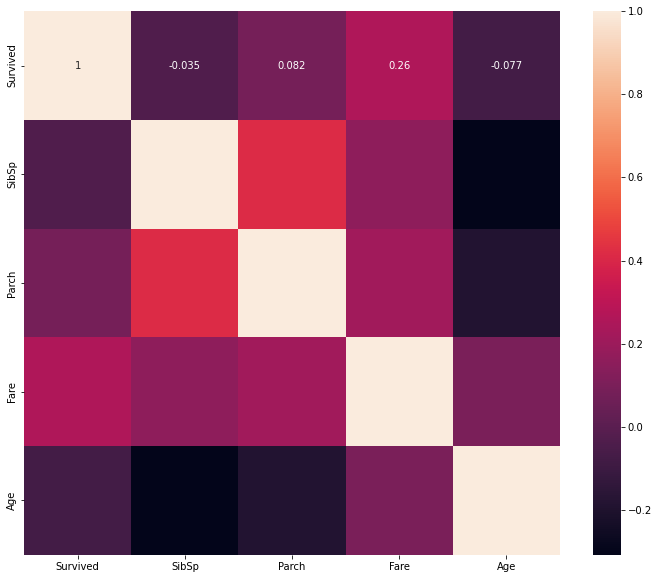

In [356]:
plt.figure(figsize=(12, 10))
corr_heatmap = sns.heatmap(df[["Survived", "SibSp", "Parch", "Fare", "Age"]].corr(), annot=True)
plt.show()


In [357]:
print(df[["Survived", "SibSp", "Parch", "Fare", "Age"]].head())


   Survived  SibSp  Parch     Fare   Age
0         0      1      0   7.2500  22.0
1         1      1      0  71.2833  38.0
2         1      0      0   7.9250  26.0
3         1      1      0  53.1000  35.0
4         0      0      0   8.0500  35.0


# Sibsp

In [358]:
df["SibSp"].nunique()


7

In [359]:
df["SibSp"].unique()


array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

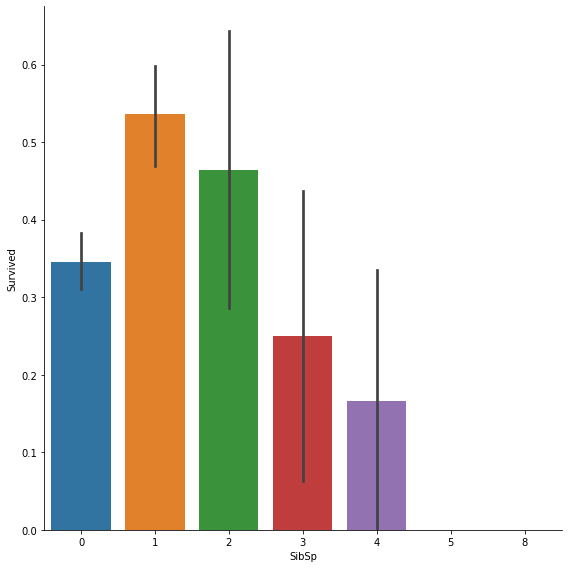

In [360]:
sns.factorplot(x="SibSp",y="Survived",data=df,kind='bar',size=8)

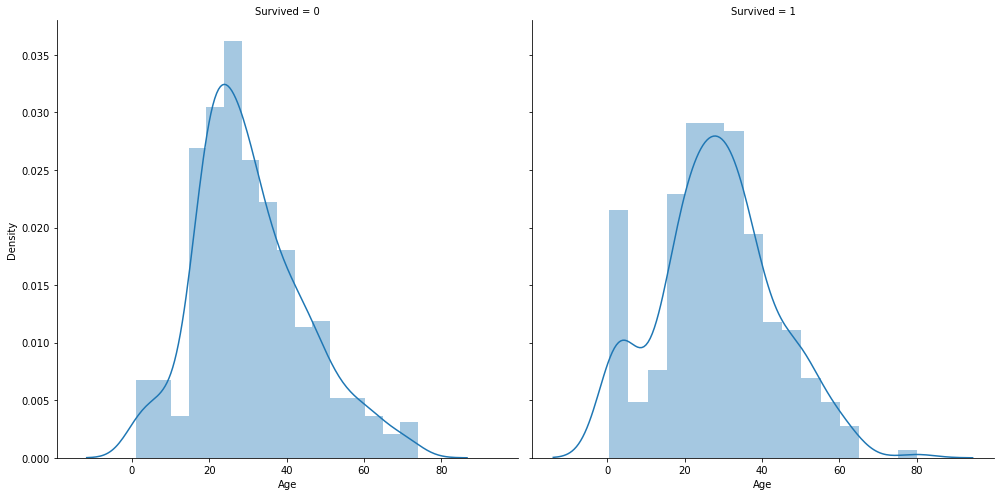

In [361]:
age_visual=sns.FacetGrid(df,col="Survived",size=7)
age_visual=age_visual.map(sns.distplot,"Age")

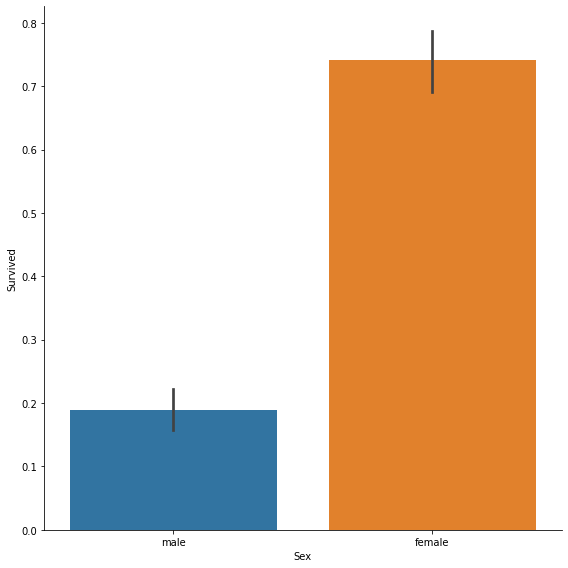

In [362]:
sns.factorplot(x="Sex",y="Survived",data=df,kind='bar',size=8)

In [363]:
df[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


sns.factorplot(x="Pclass",y="Survived",data=df,kind='bar',size=8,hue="Sex")

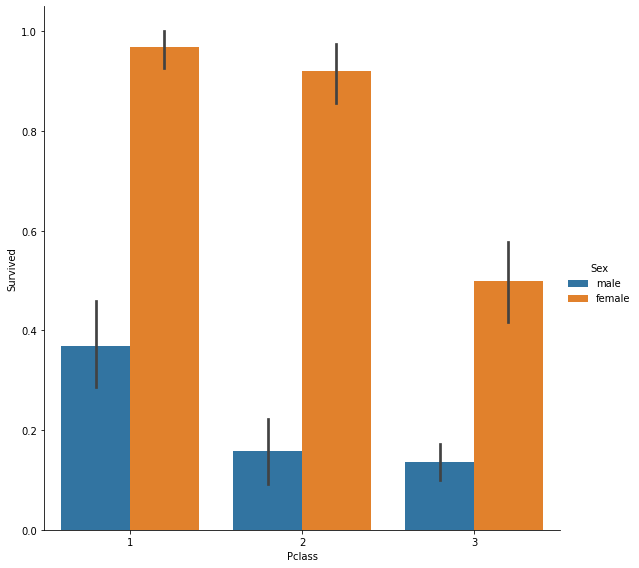

In [364]:
sns.factorplot(x="Pclass",y="Survived",data=df,kind='bar',size=8,hue="Sex")

# Embarked

In [365]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [366]:
df["Embarked"].isnull().sum()

2

In [367]:
df["Embarked"]=df["Embarked"].fillna("S")

In [368]:
df["Embarked"].isnull().sum()

0

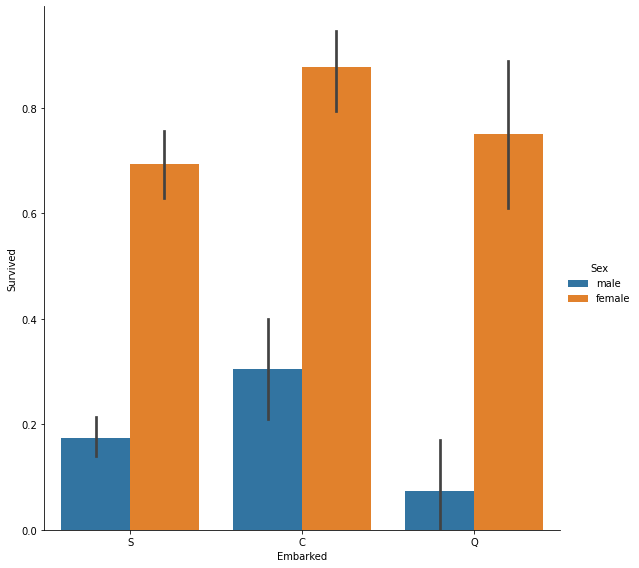

In [369]:
sns.factorplot(x="Embarked",y="Survived",data=df,kind='bar',size=8,hue="Sex")

In [370]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [371]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [372]:
mean=df["Age"].mean()
std=df["Age"].std()
is_null=df["Age"].isnull().sum()

In [373]:
print(mean,std,is_null)

29.69911764705882 14.526497332334044 177


In [374]:
rand_age=np.random.randint(mean-std,mean+std,size=is_null)

In [375]:
a=df["Age"].copy()
a[np.isnan(a)]=rand_age
df["Age"]=a

In [376]:
a

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    42.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [377]:
df["Embarked"]=df["Embarked"].fillna("S")

In [378]:
col_drop=["PassengerId","Ticket","Name","Cabin"]
df.drop(col_drop,axis=1,inplace=True)

In [379]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,42.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [380]:
gender={"male":0,"female":1}
df["Sex"]=df["Sex"].map(gender)

In [381]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,42.0,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [382]:
emb={"S":0,"C":1,"Q":2}
df["Embarked"]=df["Embarked"].map(emb)

In [383]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,42.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [384]:
x=df.drop(["Survived"],axis=1)
y=df["Survived"]

In [385]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,42.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [386]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [387]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [388]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
857,1,0,51.0,0,0,26.5500,0
52,1,1,49.0,1,0,76.7292,1
386,3,0,1.0,5,2,46.9000,0
124,1,0,54.0,0,1,77.2875,0
578,3,1,41.0,1,0,14.4583,1
...,...,...,...,...,...,...,...
835,1,1,39.0,1,1,83.1583,1
192,3,1,19.0,1,0,7.8542,0
629,3,0,35.0,0,0,7.7333,2
559,3,1,36.0,1,0,17.4000,0


In [389]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,3,0,43.0,0,0,14.4583,1
648,3,0,29.0,0,0,7.5500,0
278,3,0,7.0,4,1,29.1250,2
31,1,1,20.0,1,0,146.5208,1
255,3,1,29.0,0,2,15.2458,1
...,...,...,...,...,...,...,...
263,1,0,40.0,0,0,0.0000,0
718,3,0,40.0,0,0,15.5000,2
620,3,0,27.0,1,0,14.4542,1
786,3,1,18.0,0,0,7.4958,0


In [390]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

# Classification

# LOGISTIC REGRESSION

In [391]:
log_reg=LogisticRegression()


In [392]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [393]:
log_regpred=log_reg.predict(x_test)

In [394]:
#accuracy
from sklearn.metrics import accuracy_score
log_red_acc=accuracy_score(y_test,log_regpred)

In [395]:
log_red_acc

0.8059701492537313

# SVM

In [396]:
svc_classifier=SVC()

In [397]:
svc_classifier.fit(x_train,y_train)


SVC()

In [398]:
svc_classifier_pred=svc_classifier.predict(x_test)

In [399]:
#accuracy
from sklearn.metrics import accuracy_score
svc_acc=accuracy_score(y_test,svc_classifier_pred)

In [400]:
svc_acc

0.8208955223880597

# kNN

In [401]:
knn_classifier=KNeighborsClassifier ()

In [402]:
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [403]:
knn_classifier_pred=knn_classifier.predict(x_test)

In [404]:
#accuracy
from sklearn.metrics import accuracy_score
knn_acc=accuracy_score(y_test,knn_classifier_pred)

In [405]:
knn_acc

0.8022388059701493

# Decision TRee

In [406]:
decision_classifier=DecisionTreeClassifier()

In [407]:
decision_classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [408]:
decision_classifier_pred=decision_classifier.predict(x_test)

In [409]:
#accuracy
from sklearn.metrics import accuracy_score
decision_acc=accuracy_score(y_test,decision_classifier_pred)

In [410]:
decision_acc

0.8059701492537313

# Random forest

In [411]:
radomforest_classifier=RandomForestClassifier()

In [412]:
radomforest_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [413]:
radomforest_classifier_pred=radomforest_classifier.predict(x_test)

In [414]:
#accuracy
from sklearn.metrics import accuracy_score
radomforest_acc=accuracy_score(y_test,radomforest_classifier_pred)

In [415]:
radomforest_acc

0.8283582089552238

In [418]:
print("Logistic Regression :- ",round(log_red_acc*100,2))
print("SVM:- ",round(svc_acc*100,2))
print("KNN :- ",round(knn_acc*100,2))
print("Decion Tree:- ",round(decision_acc*100,2))
print("Random Forest :- ",round(radomforest_acc*100,2))

Logistic Regression :-  80.6
SVM:-  82.09
KNN :-  80.22
Decion Tree:-  80.6
Random Forest :-  82.84
